<a href="https://colab.research.google.com/github/Archittyagi101/stock_market_prediction_tesla/blob/main/Tesla_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Market Prediction Using Tesla Data Stock Prices**

Importing Required Libraries

In [4]:
import pandas as pd
import numpy as np
import math

Getting Tesla Dataset

In [5]:
data=pd.read_csv(r"/content/TSLA.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [6]:
data.shape

(2956, 7)

In [7]:
# Taking column name
column_name='Close'
df=data.reset_index()[column_name]
df.shape

(2956,)

In [9]:
import matplotlib.pyplot as plt
plt.style.use(style='fivethirtyeight')

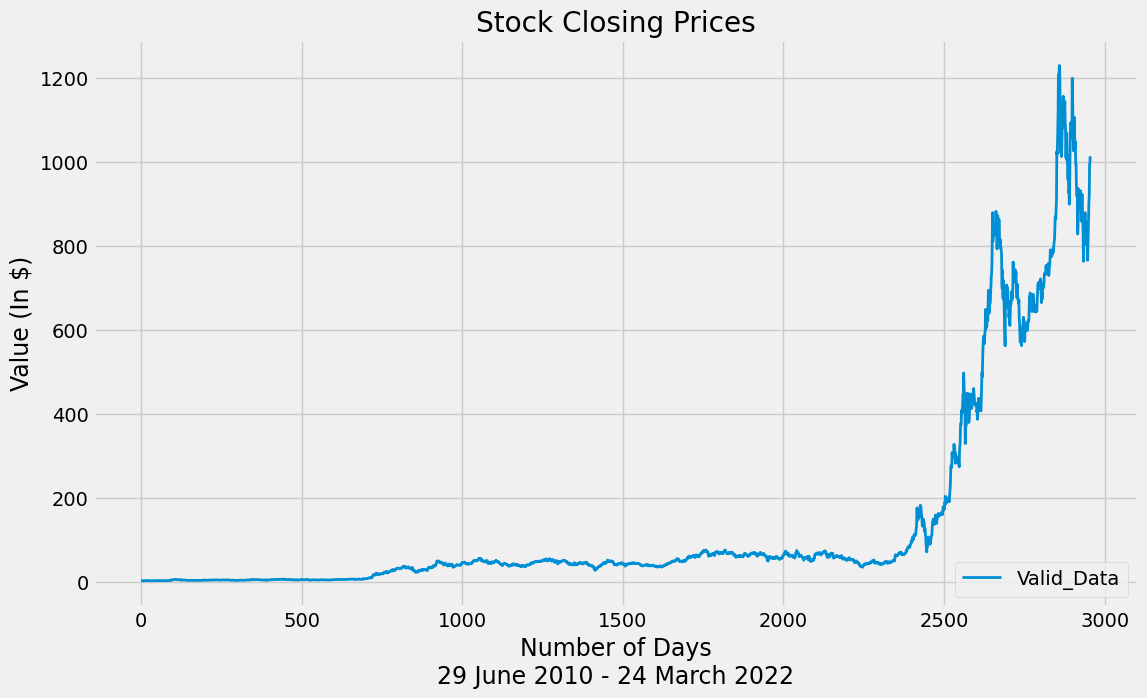

In [10]:
plt.figure(figsize=(12,7))
plt.title("Stock Closing Prices")
plt.plot(df,linewidth=2) #data[column_name]
plt.xlabel('Number of Days\n29 June 2010 - 24 March 2022',fontsize=17)
plt.ylabel('Value (In $)',fontsize=17)
plt.legend(["Valid_Data"],loc="lower right")
plt.show()

Working on only last 750 dataset for our model

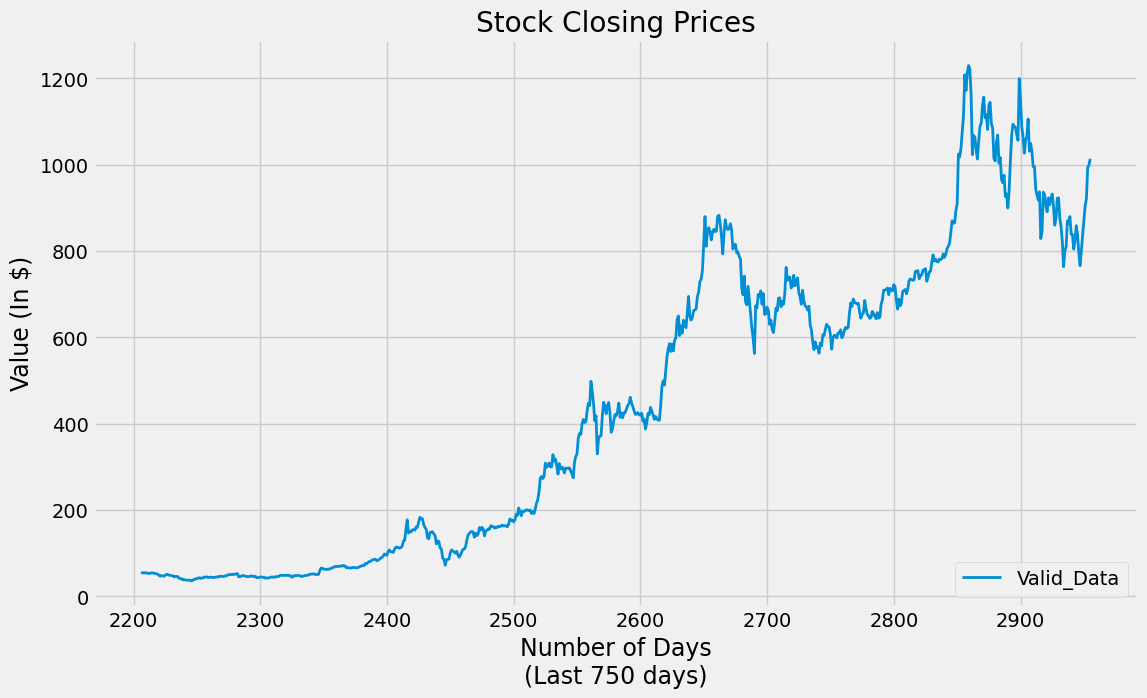

In [11]:
plt.figure(figsize=(12,7))
plt.title("Stock Closing Prices")
plt.plot(df[-750:],linewidth=2) #data[column_name]
plt.xlabel('Number of Days\n(Last 750 days)',fontsize=17)
plt.ylabel('Value (In $)',fontsize=17)
plt.legend(["Valid_Data"],loc="lower right")
plt.show()

In [12]:
# Scaling Data - Converting data into numpy Array and getting train data(70%) ,test data(30%)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

df_array=np.array(df[-750:])
train_data_len=math.ceil(len(df_array)*0.7)
test_data_len=len(df_array)-train_data_len

In [13]:
df_array.shape

(750,)

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
df_array=scaler.fit_transform(df_array.reshape(-1,1)) # Reshape -1 to 1 for 2 d array
df_array

array([[0.0148746 ],
       [0.01607717],
       [0.01578239],
       [0.01563332],
       [0.0162614 ],
       [0.01498179],
       [0.0148612 ],
       [0.01464012],
       [0.01580919],
       [0.01545243],
       [0.01579244],
       [0.01403214],
       [0.01422475],
       [0.01334711],
       [0.01149972],
       [0.0094078 ],
       [0.01046799],
       [0.01000238],
       [0.00921853],
       [0.01090849],
       [0.01273913],
       [0.01279105],
       [0.01140425],
       [0.01103243],
       [0.01055341],
       [0.01014139],
       [0.00804612],
       [0.00893381],
       [0.00887351],
       [0.0082672 ],
       [0.00536966],
       [0.00442001],
       [0.00437311],
       [0.00230464],
       [0.0027669 ],
       [0.00195291],
       [0.00162966],
       [0.00182394],
       [0.00154926],
       [0.00103675],
       [0.        ],
       [0.00245035],
       [0.00295114],
       [0.00451882],
       [0.00427597],
       [0.00567952],
       [0.00638631],
       [0.005

In [15]:
train_data=df_array[0:train_data_len,:]
test_data=df_array[train_data_len:len(df_array),:1]
test_data.shape

(225, 1)

In [16]:
# Convert dataset into x,y matrix
def create_x_y_data(dataset,step_size=1):
    x_data=[]
    y_data=[]
    for i in range(0,len(dataset)-step_size-1):
        data1= dataset[i:(i+step_size),0]
        x_data.append(data1)
        data2= dataset[(i+step_size),0]
        y_data.append(data2)
    return np.array(x_data),np.array(y_data)

In [17]:
# Taking 80 time data into account at a time
step_size=80
x_train,y_train = create_x_y_data(train_data,step_size)
x_test,y_test = create_x_y_data(test_data,step_size)

In [18]:
x_train,y_train

(array([[0.0148746 , 0.01607717, 0.01578239, ..., 0.00834927, 0.00821863,
         0.00951331],
        [0.01607717, 0.01578239, 0.01563332, ..., 0.00821863, 0.00951331,
         0.01060031],
        [0.01578239, 0.01563332, 0.0162614 , ..., 0.00951331, 0.01060031,
         0.01049144],
        ...,
        [0.58116297, 0.58563487, 0.60311223, ..., 0.58822258, 0.56020183,
         0.55154274],
        [0.58563487, 0.60311223, 0.65340884, ..., 0.56020183, 0.55154274,
         0.53697127],
        [0.60311223, 0.65340884, 0.70698826, ..., 0.55154274, 0.53697127,
         0.56413781]]),
 array([0.01060031, 0.01049144, 0.00919174, 0.00927381, 0.00826553,
        0.00867253, 0.00911972, 0.00993706, 0.00938602, 0.00838109,
        0.00938435, 0.00680838, 0.00614178, 0.00686198, 0.00801597,
        0.00785351, 0.00701104, 0.00723213, 0.00543163, 0.00603459,
        0.0058805 , 0.00613341, 0.00715843, 0.00781164, 0.00771114,
        0.00698592, 0.00847656, 0.00811982, 0.00884671, 0.00947479,
 

In [19]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [20]:
# Reshaping into 3d data -[Dataset,step_size,no_of_features] for Providing it to LSTM Model
# We have considered only 1 feature => close column
def Reshape(dataset):
    # (no_of_rows,no_of_columns,no_of_features)
    return dataset.reshape(dataset.shape[0],dataset.shape[1],1)

x_train = Reshape(x_train)
x_test = Reshape(x_test)
x_train.shape , x_test.shape

((444, 80, 1), (144, 80, 1))

In [21]:
# Applying LSTM Layer

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

In [22]:
# Compiling Model using Mean Squared Error
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 80, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 51321 (200.47 KB)
Trainable params: 51321 (200.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Train Data model
model.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
7/7 [==============================] - 10s 431ms/step - loss: 0.0495 - val_loss: 0.0165
Epoch 2/50
7/7 [==============================] - 1s 155ms/step - loss: 0.0124 - val_loss: 0.0641
Epoch 3/50
7/7 [==============================] - 1s 168ms/step - loss: 0.0066 - val_loss: 0.0092
Epoch 4/50
7/7 [==============================] - 1s 162ms/step - loss: 0.0033 - val_loss: 0.0077
Epoch 5/50
7/7 [==============================] - 1s 154ms/step - loss: 0.0025 - val_loss: 0.0064
Epoch 6/50
7/7 [==============================] - 1s 171ms/step - loss: 0.0020 - val_loss: 0.0066
Epoch 7/50
7/7 [==============================] - 1s 177ms/step - loss: 0.0017 - val_loss: 0.0078
Epoch 8/50
7/7 [==============================] - 1s 176ms/step - loss: 0.0016 - val_loss: 0.0063
Epoch 9/50
7/7 [==============================] - 2s 269ms/step - loss: 0.0015 - val_loss: 0.0071
Epoch 10/50
7/7 [==============================] - 2s 271ms/step - loss: 0.0015 - val_loss: 0.0067
Epoch 11/50
7/7 [=

In [24]:
# Testing Data By doing Prediction
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# Transform into original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Calculating Accuracy using RMSE Matrix
math.sqrt(mean_squared_error(y_train,train_predict))


5/5 [==============================] - 0s 64ms/step


411.77992127721615

In [25]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

864.2773745477285

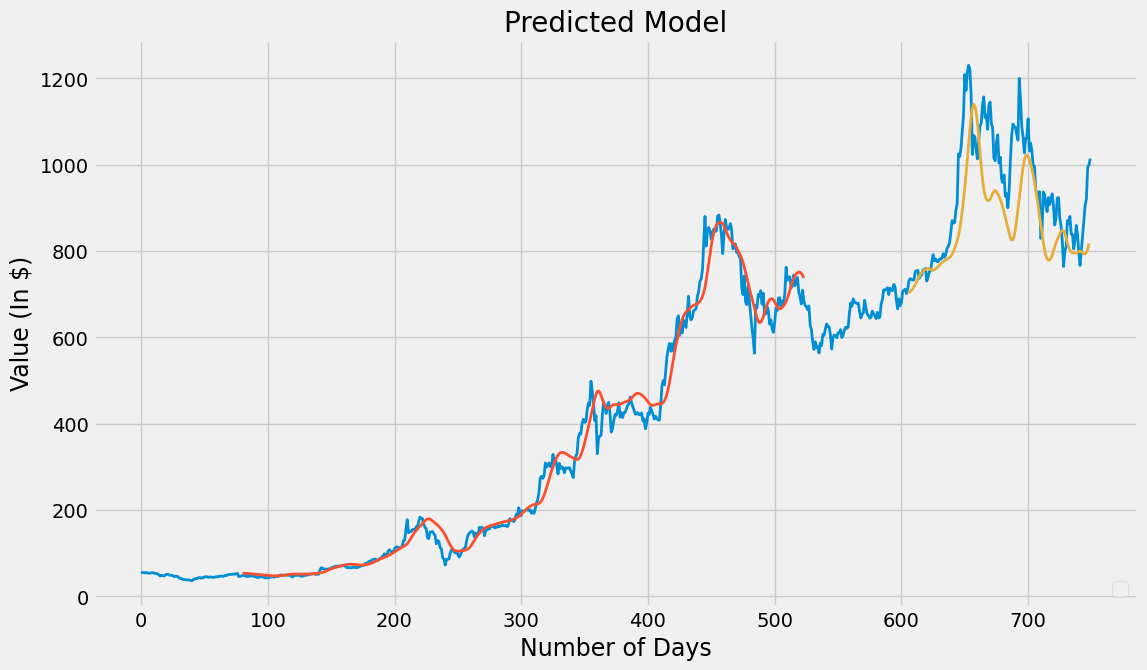

In [29]:
# Plotting Graph and Visualising data

trainPredictPlot = np.empty_like(df_array)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(train_predict)+step_size, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_array)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(step_size*2)+1:len(df_array)-1, :] = test_predict

plt.figure(figsize=(12,7))
plt.title("Predicted Model")
plt.xlabel('Number of Days',fontsize=17)
plt.ylabel('Value (In $)',fontsize=17)
plt.legend(["Validation","Train_Data","Test_Data"],loc="lower right")
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_array),linewidth=2)
plt.plot(trainPredictPlot,linewidth=2)
plt.plot(testPredictPlot,linewidth=2)


plt.show()
